In [ ]:
from google.colab import drive
drive.mount("/gdrive", force_remount = True)

Mounted at /gdrive


In [ ]:
import pandas as pd
import csv
import json
import datetime
import matplotlib.pyplot as plt
import os

In [ ]:
root = '/gdrive/My Drive/Colab Notebooks/Columbia_CLI_Project/Columbia_CLI.csv'

# Business Usecase

In [ ]:
print("We thought it would be extremely useful if we could use a multi-class classification model to assign each applicant to a corresponding grade!")

from google.colab import drive
drive.mount("/gdrive", force_remount = True)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Columbia_CLI_Project/Columbia_CLI.csv')
data

We thought it would be extremely useful if we could use a multi-class classification model to assign each applicant to a corresponding grade!
Mounted at /gdrive


,id,member_id,CLI,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,15-Jan,171.62,NaN,16-Jan,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,14-Jun,649.91,NaN,16-Jan,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,15-Jan,357.48,NaN,15-Jan,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Current,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,16-Jan,67.79,16-Feb,16-Jan,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1057818,1289186,7000,36 months,8.90,222.28,A,A5,Harvard University,5 years,OWN,50000.0,Not Verified,Fully Paid,n,NaN,debt_consolidation,Debt Consolidation,018xx,MA,16.68,0,Nov-98,1,71.0,NaN,7,0,8867,62.9,19,f,0.0,0.00,8000.341221,8000.34,7000.00,1000.34,0.00,0.00,0.00,14-Dec,229.64,NaN,14-Dec,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,1057629,1289394,2425,36 months,15.27,84.39,C,C4,Lime Energy,3 years,OWN,80004.0,Not Verified,Fully Paid,n,NaN,home_improvement,top up,088xx,NJ,23.92,1,Jul-00,3,19.0,NaN,8,0,24570,76.8,17,f,0.0,0.00,3052.790000,3052.79,2424.99,612.80,15.00,0.00,0.00,15-Jan,16.06,NaN,15-Jul,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Exploratory Data Analysis (EDA)

In [ ]:
data.isnull().sum()

id                    0
member_id             0
CLI                   0
term                  0
int_rate              0
                   ... 
all_util            999
total_rev_hi_lim    999
inq_fi              999
total_cu_tl         999
inq_last_12m        999
Length: 70, dtype: int64

In [ ]:
data.columns

Index(['id', 'member_id', 'CLI', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m'

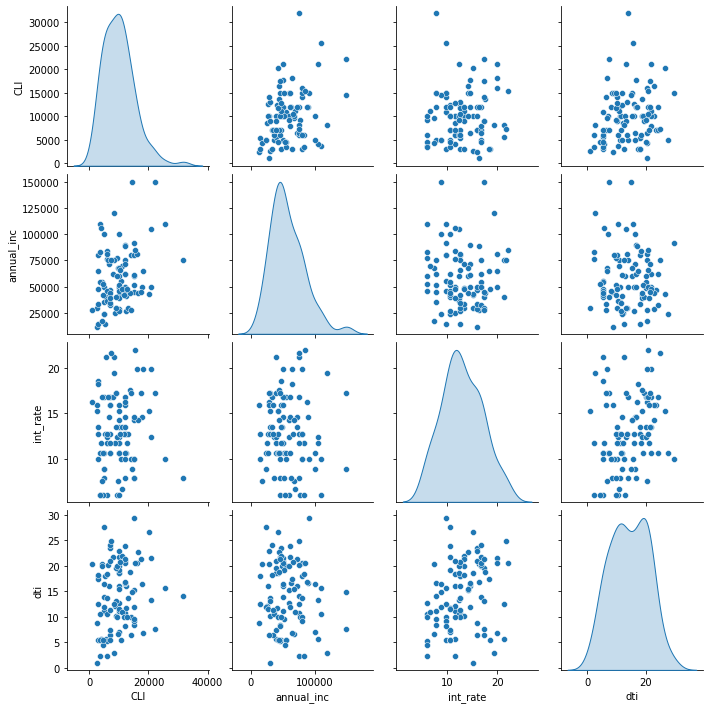

In [ ]:
df_example = data[['CLI', 'annual_inc', 'int_rate', 'dti']]
sns.pairplot(df_example[0:100], diag_kind="kde")
plt.show()

In [ ]:
data['grade'].nunique() # Meaning that the grade varies from A to G

7

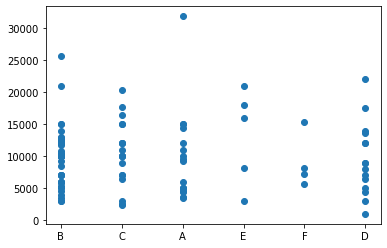

In [ ]:
# Relationship between Grade and CLI
a = data['grade'][0:100]
b = data['CLI'][0:100]
plt.scatter(a, b)
plt.show()

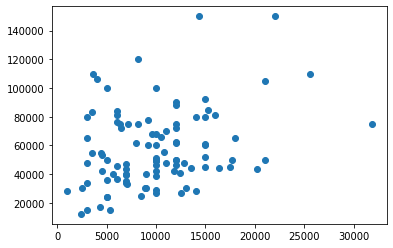

In [ ]:
# Relationship between CLI and Annual Income
a = data['CLI'][0:100]
b = data['annual_inc'][0:100]
plt.scatter(a, b)
plt.show()

In [ ]:
# Find all correlations and sort 
correlations_data = data.corr(method="pearson")['CLI'].sort_values()

# Print the correlations
print(correlations_data.head(25), '\n')

pub_rec                   -0.108388
delinq_2yrs               -0.040099
inq_last_6mths             0.001926
member_id                  0.028398
id                         0.030180
mths_since_last_delinq     0.040787
collection_recovery_fee    0.053854
revol_util                 0.062898
dti                        0.067937
recoveries                 0.100024
total_rec_late_fee         0.123866
mths_since_last_record     0.131473
open_acc                   0.133464
total_acc                  0.234801
int_rate                   0.239369
out_prncp                  0.275183
out_prncp_inv              0.275282
revol_bal                  0.364922
last_pymnt_amnt            0.393859
annual_inc                 0.399354
total_rec_int              0.690638
total_rec_prncp            0.831625
total_pymnt_inv            0.885008
total_pymnt                0.887862
installment                0.953777
Name: CLI, dtype: float64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Total,Percent
inq_last_12m,999,100.000000
open_il_24m,999,100.000000
total_cu_tl,999,100.000000
annual_inc_joint,999,100.000000
dti_joint,999,100.000000
verification_status_joint,999,100.000000
tot_coll_amt,999,100.000000
tot_cur_bal,999,100.000000
open_acc_6m,999,100.000000
open_il_6m,999,100.000000


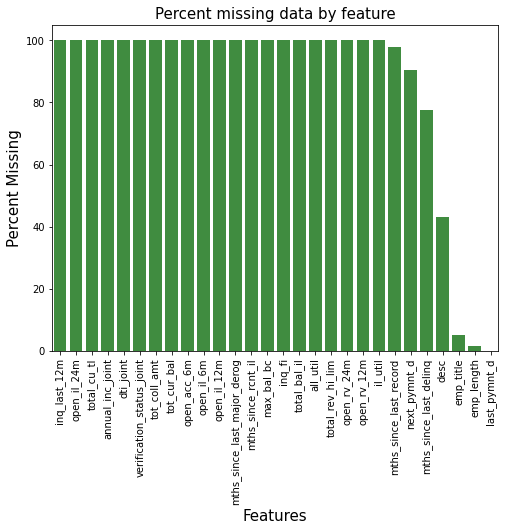

In [ ]:
#Looking at the missing data

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent Missing', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(data)


In [ ]:
# We decided to only use these columns from the dataset
data = data.loc[:, ["CLI", "grade", "annual_inc", "int_rate", "dti"]]
data

,CLI,grade,annual_inc,int_rate,dti
0,5000,B,24000.0,10.65,27.65
1,2500,C,30000.0,15.27,1.00
2,2400,C,12252.0,15.96,8.72
3,10000,C,49200.0,13.49,20.00
4,3000,B,80000.0,12.69,17.94
...,...,...,...,...,...
994,7000,A,50000.0,8.90,16.68
995,2425,C,80004.0,15.27,23.92
996,6950,B,43000.0,9.91,20.51
997,12375,B,32000.0,9.91,24.30


# Feat Engineering

In [ ]:
# Makes dataframe "X" with all features (input data)
X = data.drop(columns=["grade"])

# Makes dataframe "Y" with target feature, grade

Y = data.drop(columns = ["CLI", "annual_inc", "int_rate", "dti"])

Y = pd.get_dummies(data.grade)
Y

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
994,1,0,0,0,0,0,0
995,0,0,1,0,0,0,0
996,0,1,0,0,0,0,0
997,0,1,0,0,0,0,0


In [ ]:
X

,CLI,annual_inc,int_rate,dti
0,5000,24000.0,10.65,27.65
1,2500,30000.0,15.27,1.00
2,2400,12252.0,15.96,8.72
3,10000,49200.0,13.49,20.00
4,3000,80000.0,12.69,17.94
...,...,...,...,...
994,7000,50000.0,8.90,16.68
995,2425,80004.0,15.27,23.92
996,6950,43000.0,9.91,20.51
997,12375,32000.0,9.91,24.30


In [ ]:
Y

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
994,1,0,0,0,0,0,0
995,0,0,1,0,0,0,0
996,0,1,0,0,0,0,0
997,0,1,0,0,0,0,0


In [ ]:
# Adding new features to our dataset as they might help the model train better

newcol1 = X['annual_inc'] / X['CLI']
newcol2 = X['int_rate'] / X['dti']

X['feat1'] = newcol1
X['feat2'] = newcol2

X

,CLI,annual_inc,int_rate,dti,feat1,feat2
0,5000,24000.0,10.65,27.65,4.800000,0.385172
1,2500,30000.0,15.27,1.00,12.000000,15.270000
2,2400,12252.0,15.96,8.72,5.105000,1.830275
3,10000,49200.0,13.49,20.00,4.920000,0.674500
4,3000,80000.0,12.69,17.94,26.666667,0.707358
...,...,...,...,...,...,...
994,7000,50000.0,8.90,16.68,7.142857,0.533573
995,2425,80004.0,15.27,23.92,32.991340,0.638378
996,6950,43000.0,9.91,20.51,6.187050,0.483179
997,12375,32000.0,9.91,24.30,2.585859,0.407819


In [ ]:
# Find all correlations and sort 
correlations_data = X.corr(method="pearson")['CLI'].sort_values()

# Print the correlations
print(correlations_data, '\n')

feat1        -0.434628
feat2        -0.010858
dti           0.067937
int_rate      0.239369
annual_inc    0.399354
CLI           1.000000
Name: CLI, dtype: float64 



# Machine Learning Model Build

In [ ]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics

In [ ]:
# total of 999 records in dataset
# Divide the data set into two- 70% for train and 30% for test

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

# Check the train test data set shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((699, 6), (300, 6), (699, 7), (300, 7))

In [ ]:
# Changing X and Y dataframes so that they can be used as 1D arrays in the machine learning model build

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
y_pred_rm = model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_pred_rm, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       115
           2       1.00      0.98      0.99        59
           3       0.98      1.00      0.99        45
           4       0.52      0.92      0.67        12
           5       0.20      1.00      0.33         1
           6       0.00      0.00      0.00         0

   micro avg       0.94      0.99      0.97       285
   macro avg       0.67      0.84      0.71       285
weighted avg       0.97      0.99      0.98       285
 samples avg       0.94      0.94      0.94       285



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# To see the general accuracy of the model
accuracy = accuracy_score(y_pred_rm, y_test)
print(accuracy)

0.9433333333333334


# Results & Model Assessment

Text(91.68, 0.5, 'predicted label')

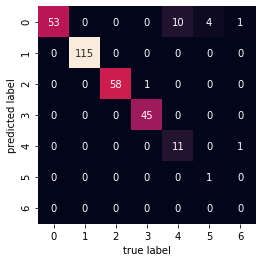

In [ ]:
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(y_test.argmax(axis=1), y_pred_rm.argmax(axis=1))

sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Overall, the model predicted categories 1 through 3 with perfect accuracy, but showed a trend of decreasing accuracy for the categories that come after.**

One explanation for this trend could be directly shown from the confusion matrix.

We can see that there weren't many 5s and 6s in the total dataset, and slight inaccuracies could result in large drops in accuracy because the evaluation is percent based.

Proposed solutions are

**1) Using more data to train the model**

**2) Doing k-fold cross-validation to make efficient use of the data**